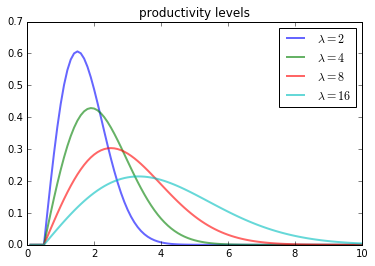

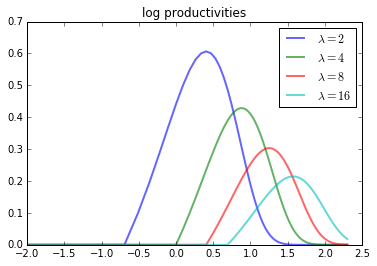

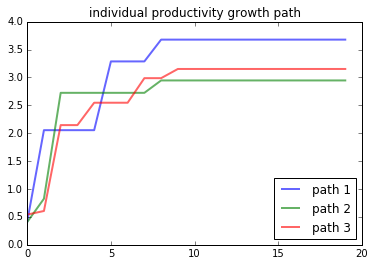

In [2]:
%matplotlib inline
from scipy.stats import genextreme as gev
from scipy.stats import frechet_r
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

lamda=2
fig, ax=plt.subplots(1,1)
c=2
alpha=np.log(2)
x=np.linspace(0.1,10, 100)

for i in range(4):
    F=frechet_r.pdf(x, c, loc=0.5, scale=(lamda)**((i+1)/c))
    currentlabel='$\lambda={}$'.format(2**(i+1))
    ax.plot(x, F, lw=2, alpha=0.6, label=currentlabel)
    ax.legend()
    ax.set_xlim(0, 10)
    ax.set_title('productivity levels')
plt.show()
fig, ax=plt.subplots(1,1)
for i in range(4):
    logx=np.log(x)
    F=frechet_r.pdf(x, c, loc=(i+1)/c, scale=(lamda)**((i+1)/c))
    currentlabel='$\lambda={}$'.format(2**(i+1))
    ax.plot(logx, F, lw=2, alpha=0.6, label=currentlabel)
    ax.legend()
    ax.set_xlim(-2, 2.5)
    ax.set_title('log productivities')
plt.show()


class search:
    
    def __init__(self, alpha, beta, r):
        self.alpha=alpha
        self.beta=beta
        self.r=r
    
    def newr(self, x):
        new=[]
        for i in range(100):
            if uniform(0,1)<self.alpha:
                y=self.r[int(uniform(0,100))]
                z=uniform(0,1.1)
                new.append(max(self.r[i], y*z**self.beta))
            else:
                new.append(self.r[i])
        return new
    
    def update(self):
        self.r=self.newr(self.r)
    
    def gs(self, t):
        path=[]
        for i in range(t):
            path.append(self.r)
            self.update()
        return path
    

T=[]
for t in range(20):
    T.append(t)
fig, ax=plt.subplots(1, 1)
for i in range(3):
    r0=frechet_r.rvs(c, loc=0.5/c, scale=(lamda)**(1/c), size=100)
    ss=search(0.8, 0, r0)
    sss=np.array(ss.gs(20))
    cl='path {}'.format(i+1)
    ax.plot(T, sss[:, 0], lw=2, alpha=0.6, label=cl)
    ax.legend(loc='best')
    ax.set_title('individual productivity growth path')
plt.show()